In [12]:
import cv2
import numpy as np

from skimage.measure import label, regionprops
import matplotlib.pyplot as plt


In [13]:
# Reading multiple images
obj_1_image = cv2.imread('./train/obj1__0.jpg')  # Replace with the correct file path
obj_2_image = cv2.imread('./train/obj2__0.jpg')  # Replace with the correct file path
obj_3_image = cv2.imread('./train/obj3__0.jpg')  # Replace with the correct file path

# Optional: Convert images to RGB if needed for visualization with Matplotlib
image1 = cv2.cvtColor(obj_1_image, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(obj_2_image, cv2.COLOR_BGR2RGB)
image3 = cv2.cvtColor(obj_3_image, cv2.COLOR_BGR2RGB)



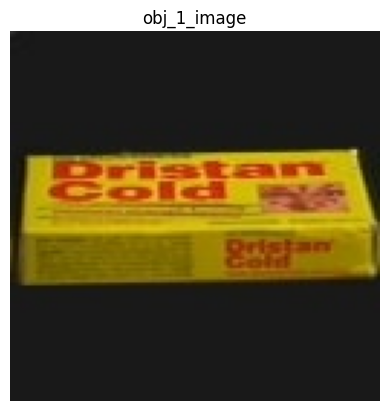

In [14]:
plt.imshow(image1)
plt.title('obj_1_image')
plt.axis('off')
plt.show()

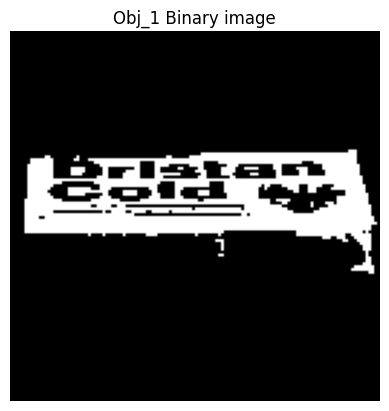

In [15]:
# Convert the first image to grayscale
image1_g = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)

# Convert the grayscale image to a binary image (thresholding)
_, image1_b = cv2.threshold(image1_g, 127, 255, cv2.THRESH_BINARY)
# image1_b[top_Threshold:bottom_Threshold] = 0


# Display the binary image
plt.imshow(image1_b, cmap='gray')
plt.title('Obj_1 Binary image')
plt.axis('off')  # Hide axis for better visualization
plt.show()


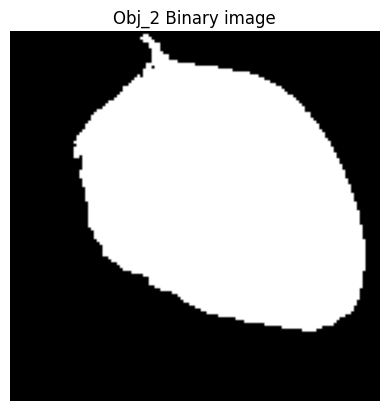

In [16]:
# Convert the second image to grayscale
image2_g = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

# Convert the grayscale image to a binary image (thresholding)
_, image2_b = cv2.threshold(image2_g, 127, 255, cv2.THRESH_BINARY)

# Display the binary image
plt.imshow(image2_b, cmap='gray')
plt.title('Obj_2 Binary image')
plt.axis('off')  # Hide axis for better visualization
plt.show()

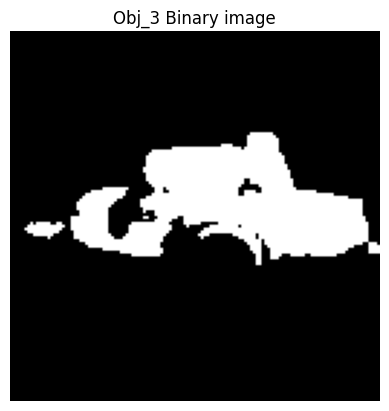

In [17]:
# Convert the third image to grayscale
image3_g = cv2.cvtColor(image3, cv2.COLOR_RGB2GRAY)

# Convert the grayscale image to a binary image (thresholding)
_, image3_b = cv2.threshold(image3_g, 127, 255, cv2.THRESH_BINARY)


# Display the binary image
plt.imshow(image3_b, cmap='gray')
plt.title('Obj_3 Binary image')
plt.axis('off')  # Hide axis for better visualization
plt.show()

In [18]:
# I1 is the binary image image1_b
I1 = image1_b

# Calculate the area (number of white pixels)
Area_obj_1 = np.sum(I1 == 255)

# Display the area
print(Area_obj_1)

2386


In [19]:
# I2 is the binary image image2_b
I2 = image2_b

# Calculate the area (number of white pixels)
Area_obj_2 = np.sum(I2 == 255)

# Display the area
print(Area_obj_2)

6969


In [20]:
# I3 is the binary image image3_b
I3 = image3_b

# Calculate the area (number of white pixels)
Area_obj_3 = np.sum(I3 == 255)

# Display the area
print(Area_obj_3)

2557


In [21]:
def model(img_path):
    # Reading multiple images
        image_test = cv2.imread(img_path)  # Replace with the correct file path
        image_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB)

        # Convert the fourth image to grayscale
        image_test_g = cv2.cvtColor(image_test, cv2.COLOR_RGB2GRAY)

        # Convert the grayscale image to a binary image (thresholding)
        _, image_test_b = cv2.threshold(image_test_g, 127, 255, cv2.THRESH_BINARY)
        # image_test_b[top_Threshold:bottom_Threshold] = 0

        # I_test is the binary image image_test_b
        I_test = image_test_b

        # Calculate the area (number of white pixels)
        Area_test = np.sum(I_test == 255)

        difference_array=[abs(Area_test-Area_obj_1),abs(Area_test-Area_obj_2),abs(Area_test-Area_obj_3)]

        min_diff=min(difference_array)
        index= difference_array.index(min_diff)
        if(index==0):
            print("The object is obj1")
            return "Obj_1"
        elif(index==1):
            print("The object is obj2")
            return "Obj_2"
        else:
            print("The object is obj3")
            return "Obj_3"


In [22]:
import os
import shutil
from pathlib import Path

class_folders = {
    "Obj_1": "Obj_1",
    "Obj_2": "Obj_2",
    "Obj_3": "Obj_3"
}

input_folder = "./test"  # Replace with the correct folder path

# output base folder
output_folder = "./"

for folder_name in class_folders.values():
    os.makedirs(os.path.join(output_folder, folder_name), exist_ok=True)

# Initialize counters for renaming
counters = {key: 1 for key in class_folders.keys()}

# Iterate through images in the input folder
for image_path in Path(input_folder).glob("*.*"):
    # Classify the image
    image_class = model(image_path)

    # Get corresponding folder name
    folder_name = class_folders[image_class]

    # Generate new filename
    new_filename = f"{image_class}_{counters[image_class]:02d}{image_path.suffix}"

    # Define destination path
    dest_path = os.path.join(output_folder, folder_name, new_filename)

    # Move and rename the image
    shutil.copy(str(image_path), dest_path)

    # Increment counter for that class
    counters[image_class] += 1

    print(f"Processed: {image_path.name} → {dest_path}")

print("Image classification and renaming completed.")


The object is obj1
Processed: obj1__0.jpg → ./Obj_1\Obj_1_01.jpg
The object is obj1
Processed: obj1__10.jpg → ./Obj_1\Obj_1_02.jpg
The object is obj1
Processed: obj1__15.jpg → ./Obj_1\Obj_1_03.jpg
The object is obj1
Processed: obj1__20.jpg → ./Obj_1\Obj_1_04.jpg
The object is obj1
Processed: obj1__25.jpg → ./Obj_1\Obj_1_05.jpg
The object is obj1
Processed: obj1__30.jpg → ./Obj_1\Obj_1_06.jpg
The object is obj1
Processed: obj1__35.jpg → ./Obj_1\Obj_1_07.jpg
The object is obj1
Processed: obj1__40.jpg → ./Obj_1\Obj_1_08.jpg
The object is obj1
Processed: obj1__5.jpg → ./Obj_1\Obj_1_09.jpg
The object is obj1
Processed: obj1__50.jpg → ./Obj_1\Obj_1_10.jpg
The object is obj2
Processed: obj2__0.jpg → ./Obj_2\Obj_2_01.jpg
The object is obj2
Processed: obj2__10.jpg → ./Obj_2\Obj_2_02.jpg
The object is obj2
Processed: obj2__15.jpg → ./Obj_2\Obj_2_03.jpg
The object is obj2
Processed: obj2__20.jpg → ./Obj_2\Obj_2_04.jpg
The object is obj2
Processed: obj2__25.jpg → ./Obj_2\Obj_2_05.jpg
The object is